<a href="https://colab.research.google.com/github/ppn101/Projects/blob/main/Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
#Importing dependencies required for the project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [91]:
#Importing and storing the file into a dataframe
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/insurance.csv")

In [92]:
#Returning the first 3 rows of the dataframe
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [93]:
#Obtaining a statistical summary of the entire dataframe
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [94]:
#Getting info on the number of rows and columns in the dataframe
df.shape

(1338, 7)

In [95]:
#Getting info on the datatypes of the features & label in the the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [96]:
#Checking the count of rows with null values for each column in the entire dataframe
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [97]:
#Getting categorical sum of values in the sex column
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [98]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [99]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


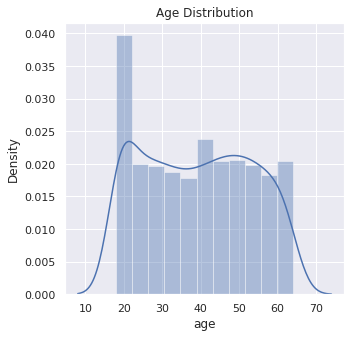

In [100]:
#Plotting distribution of age (Since this is a continous variable hence distplot)
sns.set()
plt.figure(figsize = (5,5))
sns.distplot(df["age"])
plt.title("Age Distribution")
plt.show()

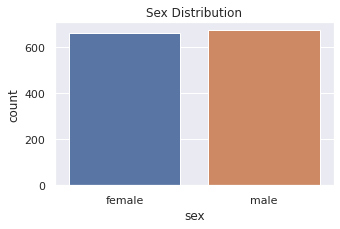

In [101]:
#Plotting distribution for gender (Since this is non continous distribution hence countplot)
plt.figure(figsize = (5,3))
sns.countplot(x = "sex", data = df)
plt.title("Sex Distribution")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


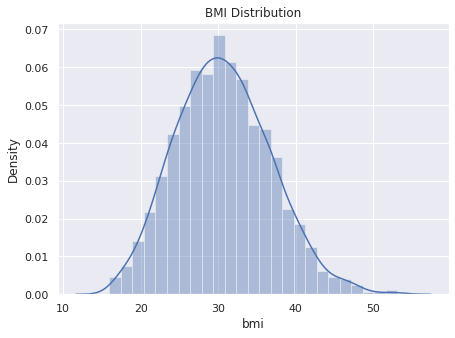

In [102]:
#Plotting distribution for bmi
plt.figure(figsize = (7,5))
sns.distplot(df["bmi"])
plt.title("BMI Distribution")
plt.show()

In [103]:
df["children"].value_counts(ascending = False)

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

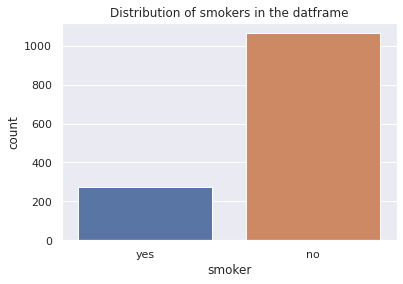

In [104]:
sns.countplot(x = "smoker", data = df)
plt.title("Distribution of smokers in the datframe")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of chages')

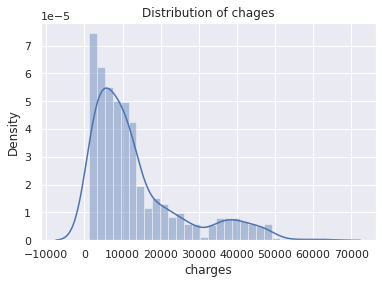

In [105]:
#Plotting distribution of charges in the dataframe.
sns.distplot(df["charges"])
plt.title("Distribution of chages")

In [106]:
#Step by step encoding of categorical features into numerical values
df["sex"].replace(to_replace = "male" , value = 1, inplace = True)
df["sex"].replace(to_replace = "female", value = 0, inplace = True)
df["smoker"].replace(to_replace = "yes", value = 1, inplace = True)
df["smoker"].replace(to_replace = "no", value = 0, inplace = True)
df["region"].replace(to_replace = "southwest", value = 0, inplace = True)
df["region"].replace(to_replace = "southeast", value = 1, inplace = True)
df["region"].replace(to_replace = "northwest", value = 2, inplace = True)
df["region"].replace(to_replace = "northeast", value = 3, inplace = True)

In [107]:
#Condensed way of performing encoding using dictionaries
df.replace({"sex":{"male":1, "female":0},"smoker":{"yes":1, "no":0}, "region":{"southwest":0, "southeast":1, "northwest": 2, "northeast":3}}, inplace = True)
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,0,16884.9240
1,18,1,33.77,1,0,1,1725.5523
2,28,1,33.00,3,0,1,4449.4620


In [108]:
#Creating features and label dataframe from the entire dataframe by dropping columns
features = df.drop("charges", axis = 1)
label = df["charges"]

In [109]:
print(features.shape)
print(label.shape)

(1338, 6)
(1338,)


In [110]:
features.head(3)

,age,sex,bmi,children,smoker,region
0,19,0,27.90,0,1,0
1,18,1,33.77,1,0,1
2,28,1,33.00,3,0,1


In [111]:
#Splitting the entire dataframe into train and test dataframes respectively
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size= 0.1, random_state = 1)

In [112]:
print(features_train.shape)
print(features_test.shape)
print(label_train.shape)
print(label_test.shape)

(1204, 6)
(134, 6)
(1204,)
(134,)


In [113]:
#Initialising the required model and training it on train data.
model = LinearRegression()
model.fit(features_train, label_train)

LinearRegression()

In [114]:
#Checking the accuracy of the model on training data
predict_train = model.predict(features_train)
accuracy_train = metrics.r2_score(label_train, predict_train)
print(round(accuracy_train,2))

0.75


In [115]:
#Checking the accuracy of the model on test data
predict_test = model.predict(features_test)
accuracy_test = metrics.r2_score(label_test, predict_test)
print(round(accuracy_test,2))

0.73


In [ ]:
#Building a system to predict output from input data using the model
input_data = () #Enter a list of values (features) inside the ()

input_array = np.asarray(input_data)
input_transform = input_array.reshape(1,-1)

predict = model.predict(input_transform)
print("The Insurance Cost is: " + str(predict))